In [44]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [45]:
cols = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
        'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
        'radius_MAX', 'texture_MAX', 'perimeter_MAX', 'area_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']
df = pd.read_csv('../../Wisconsin_Database/wdbc.data', header=None)
df.columns = cols
df['Diagnosis'] = df['Diagnosis'].map(
                   {'M':1 ,'B':0})
print(df.shape)

(569, 32)


In [46]:
X = df[cols[2:]]
y = df[cols[1]]

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
print('X_train: {}, X_test: {}'.format(str(X_train.shape), str(X_test.shape)))
print('Y_train: {}, Y_test: {}'.format(str(y_train.shape), str(y_test.shape)))

scaler = StandardScaler()
scaler.fit(X_train)

# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

col_names=df.columns[2:]
scaled_df = pd.DataFrame(X_train, columns=col_names)
scaled_df.describe().T

X_train: (455, 30), X_test: (114, 30)
Y_train: (455,), Y_test: (114,)


,count,mean,std,min,25%,50%,75%,max
radius,455.0,-3.328229e-16,1.001101,-1.819583,-0.683093,-0.231498,0.459343,3.961679
texture,455.0,-4.599495e-17,1.001101,-2.223500,-0.707536,-0.118516,0.563199,4.715674
perimeter,455.0,-8.808583e-17,1.001101,-1.809497,-0.690761,-0.242938,0.488480,3.976811
area,455.0,3.589314e-16,1.001101,-1.365036,-0.660205,-0.289597,0.319339,5.208312
smoothness,455.0,-2.039882e-16,1.001101,-3.100011,-0.713204,-0.080820,0.633173,4.864642
compactness,455.0,-3.855280e-17,1.001101,-1.607228,-0.777087,-0.241340,0.528128,3.964311
concavity,455.0,-1.017501e-16,1.001101,-1.119899,-0.750539,-0.344646,0.547387,4.256736
concave_points,455.0,2.237526e-16,1.001101,-1.269910,-0.734905,-0.391123,0.673757,4.022271
symmetry,455.0,1.238326e-16,1.001101,-2.345430,-0.701046,-0.069151,0.535429,4.476124
fractal_dimension,455.0,4.914262e-16,1.001101,-1.776889,-0.709792,-0.177285,0.464223,4.815921


In [47]:
regressor = KNeighborsRegressor(n_neighbors=4)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [48]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 0.06140350877192982
mse: 0.036140350877192993
rmse: 0.19010615686293011


In [49]:
regressor.score(X_test, y_test)

0.8461578774975433

In [50]:
error = []

for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)


Text(0, 0.5, 'Mean Absolute Error')

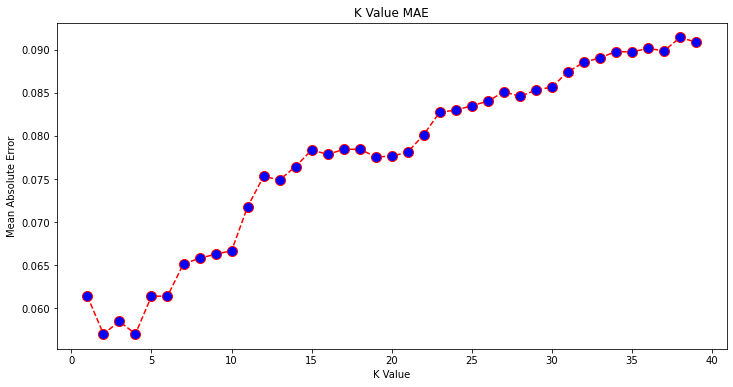

In [51]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)     
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')